---
## Exploration

### Problem Statement

 

We would like you work on recommendation engine problem:



- Present the Recommendation Output results along with Approach and Interpretation.
- Explain the Approach / Model in detail.

### About MovieLens Dataset:

The data is developed by GroupLens Research for their Movie Recommender System Project - MovieLens. It contains four csv datasets - movies.csv, ratings.csv, links.csv and tags.csv each of which have either of the two identifiers - userId and movieId. The dataset was developed over a period of 22 years wherein only those randomized and anonymized users who have rated atleast 20 movies have been selected, and only those movies which have atleast 1 rating or tag have been selected. Description of the columns in the dataset:

Identifiers:

*  userId - random and anonymous IDs given to identify users. This is the only way a user can be recognized as no other demographic information is given. The IDs are a complete sequence from 1 to 610.
*   movieId - IDs given to identify movies. Since only those movies which have 1 or more rating or tag are selected, it is not a complete sequence.

movies.csv:
*   title -  the title of the movie alongwith the year of release.
*   genre - tags of genres given. Possible values: action, adventure, animation, children's, comedy, crime, documentary, drama, fantasy, film-noir, horror, musical, mystery, romance, sci-fi, thriller, war, western, (no genre listed).

ratings.csv:
*   rating - ratings given by user. Maximum Value: 5; Minimum Value: 0.5; Step Value: 0.5.
*   timestamp - timestamp of when the movie was rated (UTC Time).

links.csv:
*   imdbId: link to the imdb page of the movie.
*   tmbdId: link to the moviedb page of the movie.

tags.csv:
*   tag: a word or short phrase that describes the user's impressions about the movie. 
*   timestamp - timestamp of when the movie was rated (UTC Time).


The datases have been ordered by the userIds, and inside the userId, by the movieId.

---
## Get the data & Setup in local system

In [ ]:
# Downloading the dataset to local(colab)
!wget https://files.grouplens.org/datasets/movielens/ml-25m.zip

--2022-06-26 11:39:19--  https://files.grouplens.org/datasets/movielens/ml-25m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261978986 (250M) [application/zip]
Saving to: ‘ml-25m.zip’

ml-25m.zip          100%[===================>] 249.84M   130MB/s    in 1.9s    

2022-06-26 11:39:21 (130 MB/s) - ‘ml-25m.zip’ saved [261978986/261978986]



In [ ]:
# Extract the downloaded file
!unzip ml-25m.zip

Archive:  ml-25m.zip
   creating: ml-25m/
  inflating: ml-25m/tags.csv         
  inflating: ml-25m/links.csv        
  inflating: ml-25m/README.txt       
  inflating: ml-25m/ratings.csv      
  inflating: ml-25m/genome-tags.csv  
  inflating: ml-25m/genome-scores.csv  
  inflating: ml-25m/movies.csv       


### View Raw data

In [ ]:
%%bash
head ml-25m/genome-scores.csv

movieId,tagId,relevance
1,1,0.028749999999999998
1,2,0.023749999999999993
1,3,0.0625
1,4,0.07574999999999998
1,5,0.14075
1,6,0.14675
1,7,0.0635
1,8,0.20375
1,9,0.202


In [ ]:
%%bash
head ml-25m/genome-tags.csv

tagId,tag
1,007
2,007 (series)
3,18th century
4,1920s
5,1930s
6,1950s
7,1960s
8,1970s
9,1980s


In [ ]:
%%bash
head ml-25m/links.csv

movieId,imdbId,tmdbId
1,0114709,862
2,0113497,8844
3,0113228,15602
4,0114885,31357
5,0113041,11862
6,0113277,949
7,0114319,11860
8,0112302,45325
9,0114576,9091


In [ ]:
%%bash
head ml-25m/movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action


In [ ]:
%%bash
head ml-25m/ratings.csv

userId,movieId,rating,timestamp
1,296,5.0,1147880044
1,306,3.5,1147868817
1,307,5.0,1147868828
1,665,5.0,1147878820
1,899,3.5,1147868510
1,1088,4.0,1147868495
1,1175,3.5,1147868826
1,1217,3.5,1147878326
1,1237,5.0,1147868839


In [ ]:
%%bash
head ml-25m/tags.csv

userId,movieId,tag,timestamp
3,260,classic,1439472355
3,260,sci-fi,1439472256
4,1732,dark comedy,1573943598
4,1732,great dialogue,1573943604
4,7569,so bad it's good,1573943455
4,44665,unreliable narrators,1573943619
4,115569,tense,1573943077
4,115713,artificial intelligence,1573942979
4,115713,philosophical,1573943033


---
## Library Imports

In [619]:
# importing the libraries
import numpy as np #for data manipulation
import pandas as pd #for data manipulation
from matplotlib import pyplot as plt #for data visualization
from wordcloud import WordCloud
import squarify
import seaborn as sns #for data visualization
sns.set_style('darkgrid')

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# to compute the distances and hence similarity between the users and movies.
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cosine, correlation

# for sampling lists
import random

---
## Load & Processing the Data

#### Loading the datasets

In [620]:
# root/main directory path location
directory_path = "ml-25m/"

# reading the Genome-Scores dataset
df_gs_orig = pd.read_csv(directory_path+"genome-scores.csv")
# reading the Genome-Tags dataset
df_gt_orig = pd.read_csv(directory_path+"genome-tags.csv")

# reading the links dataset
df_links_orig = pd.read_csv(directory_path+"links.csv")

# reading the movies dataset
df_movies_orig = pd.read_csv(directory_path+"movies.csv")

# reading the ratings dataset
df_ratings_orig = pd.read_csv(directory_path+"ratings.csv")

# reading the tags dataset
df_tags_orig = pd.read_csv(directory_path+"tags.csv")

#### Processing Movies dataset

In [621]:
# viewing the first 5 rows of the movies dataset
print("original dataset shape: ",df_movies_orig.shape)
print("dataset shape: ",df_movies_orig.shape)
df_movies_orig.head()

original dataset shape:  (62423, 3)
dataset shape:  (62423, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [622]:
df_movies_orig.movieId.nunique

<bound method IndexOpsMixin.nunique of 0             1
1             2
2             3
3             4
4             5
          ...  
62418    209157
62419    209159
62420    209163
62421    209169
62422    209171
Name: movieId, Length: 62423, dtype: int64>

Initially we had 62423 movies list in the dataset. we are going to select 2000 movies out of them

In [623]:
subset_movies = sorted(df_movies_orig.movieId.value_counts().index)[:2000]
df_movies = df_movies_orig[df_movies_orig.movieId.isin(subset_movies)]
print(df_movies.shape)
df_movies.head()

(2000, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Processing Genome-Scores dataset

In [624]:
# viewing the first 5 rows of the genome-scores dataset
print("original dataset shape: ",df_gs_orig.shape)
df_gs = df_gs_orig[df_gs_orig.movieId.isin(subset_movies)]
print("dataset shape: ",df_gs.shape)
df_gs.head()

original dataset shape:  (15584448, 3)
dataset shape:  (2086800, 3)


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


#### Processing Genome-Tags dataset

In [625]:
# viewing the first 5 rows of the genome-tags dataset
print("original dataset shape: ",df_gt_orig.shape)
df_gt = df_gt_orig.copy()
print("dataset shape: ",df_gt.shape)
df_gt.head()

original dataset shape:  (1128, 2)
dataset shape:  (1128, 2)


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [626]:
# checking for uniqueness in the tags
df_gt.tagId.value_counts()

1       1
750     1
756     1
755     1
754     1
       ..
383     1
384     1
385     1
386     1
1128    1
Name: tagId, Length: 1128, dtype: int64

All are unique tags. so, no need to change anything

#### Processing Links dataset

In [627]:
# viewing the first 5 rows of the links dataset
print("original dataset shape: ",df_links_orig.shape)

# get the subset of links dataset based on updated movies dataset
df_links = df_links_orig[df_links_orig.movieId.isin(subset_movies)]

print("current dataset shape: ",df_links.shape)
df_links.head()

original dataset shape:  (62423, 3)
current dataset shape:  (2000, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


#### Processing Ratings dataset

In [628]:
# viewing the first 5 rows of the ratings dataset
print("original dataset shape: ",df_ratings_orig.shape)
df_ratings = df_ratings_orig[df_ratings_orig.movieId.isin(subset_movies)]
print("dataset shape: ",df_ratings.shape)
df_ratings.head()

original dataset shape:  (25000095, 4)
dataset shape:  (10040512, 4)


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [629]:
users_list = sorted(df_ratings['userId'].unique())[:1000]
df_ratings = df_ratings[df_ratings.userId.isin(users_list)]
df_ratings.shape

(59956, 4)

In [630]:
print("Unique Movies listed in ratings: ", len(sorted(df_ratings['movieId'].value_counts().index)))

Unique Movies listed in ratings:  1712


#### Processing Tags dataset

In [631]:
# viewing the first 5 rows of the tags dataset
print("original dataset shape: ",df_tags_orig.shape)
df_tags = df_tags_orig[df_tags_orig.movieId.isin(subset_movies)]
print("dataset shape: ",df_tags.shape)
df_tags.head()

original dataset shape:  (1093360, 4)
dataset shape:  (188735, 4)


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
23,20,1210,bah,1155082282


---
## Analysis/Engineering of Data

#### Checking for Null Values

In [632]:
# checking in Movies dataset
df_movies.isna().any()

movieId    False
title      False
genres     False
dtype: bool

In [633]:
# checking in Ratings dataset
df_ratings.isna().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [634]:
# checking in Tags dataset
df_tags.isna().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

Found Null values

In [635]:
df_tags.isna().sum()

userId       0
movieId      0
tag          4
timestamp    0
dtype: int64

In [636]:
df_tags.shape

(188735, 4)

as it has negligible amount of rows are missing, lets remove them

In [637]:
# lets drop null rows
df_tags=df_tags.dropna()

In [638]:
#summary of ratings.csv
df_ratings.describe()

,userId,movieId,rating,timestamp
count,59956.000000,59956.000000,59956.000000,5.995600e+04
mean,529.159617,878.167890,3.618946,1.076616e+09
std,297.973816,599.900332,1.044362,2.169702e+08
min,1.000000,1.000000,0.500000,8.281634e+08
25%,259.000000,349.000000,3.000000,9.010175e+08
50%,548.000000,802.000000,4.000000,9.993972e+08
75%,805.000000,1291.000000,4.500000,1.204059e+09
max,1007.000000,2088.000000,5.000000,1.574195e+09


#### Genre Analysis

In [639]:
# filtering to get the list of drama movies
drama_movies = df_movies['genres'].str.contains('Drama')

#total number of drama movies
print("Total drama movies: ",drama_movies.shape[0])

df_movies[drama_movies].head()

Total drama movies:  2000


,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Crime|Drama
16,17,Sense and Sensibility (1995),Drama|Romance


In [640]:
# filtering to get the list of comedy movies
comedy_movies = df_movies['genres'].str.contains('Comedy')

#total number of drama movies
print("Total Comedy movies: ",comedy_movies.shape[0])

df_movies[comedy_movies].head()

Total Comedy movies:  2000


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [641]:
#minimum rating given to a movie
print("Minimum rating given: ", df_ratings['rating'].min())

#maximum rating given to a movie
print("Maximum rating given: ", df_ratings['rating'].max())

Minimum rating given:  0.5
Maximum rating given:  5.0


In [642]:
print('Shape: ', df_movies.shape)
print('Total Unique Movies: ', df_movies.movieId.nunique())
print('Total Unique Movie Titles: ', df_movies.title.nunique())
print("Mismatch Count: ", df_movies.movieId.nunique()-df_movies.title.nunique())

Shape:  (2000, 3)
Total Unique Movies:  2000
Total Unique Movie Titles:  2000
Mismatch Count:  0


There is a mismatch between movieIds and title of movies.

In [643]:
df_movies.title.value_counts().sort_values(ascending=False)

Toy Story (1995)                      1
Casino (1995)                         1
Grumpier Old Men (1995)               1
Waiting to Exhale (1995)              1
Father of the Bride Part II (1995)    1
                                     ..
One Magic Christmas (1985)            1
Peter Pan (1953)                      1
BASEketball (1998)                    1
Parent Trap, The (1998)               1
Popeye (1980)                         1
Name: title, Length: 2000, dtype: int64

### Create a Pivot Table

Every individual row represents a user and columns represent movies.

In [644]:
# creating a pivot table
# Pivot: It allows you to transform or reshape data
# Pivot Table: Summerize and aggregate data inside dataframe

pd.pivot_table(df_ratings, index='userId', columns='movieId', values='rating')


movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,...,2037,2038,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,4.5,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,

As we can see, there are a lot of NaN or missing values in the dataset. To handle the missing values, we will fill them with a constant. The constant has to be a value that does not clash with the values in the dataset. To do so, let's find the ratings present in the dataset.

In [645]:
# finding all the values in the rating column
df_ratings.rating.unique()

array([5. , 3.5, 4. , 2.5, 0.5, 4.5, 1. , 2. , 3. , 1.5])

As we can see, no user has given a rating of '0' to any movie. Hence, we use the constant 0 to fill in the missing values by setting the parameter fill_value to 0, and convert it to a Pandas DataFrame

In [646]:
# filling the missing values in the pivot table with 0 and converting to DataFrame
df = pd.DataFrame(pd.pivot_table(df_ratings, index='userId', columns='movieId', values='rating', fill_value=0))
df

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,...,2037,2038,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,2.5,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,3.5,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,1.5,0.0,4.5,0.0,0.0,0,0.0,0.0
3,4.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,4.5,0,0.0,4.5,0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,5.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,3.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
5,4.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,5.0,0,0.0,0,5.0,0,0,2.0,0.0,0,0,0,0.0,0.0,0,5.0,0.0,5.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1004,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,3.0,0.0,0,0.0,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,4.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1005,0.0,0.0,0.0,0,0.0,5.0,0.0,0,0,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,3.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


As we can see, the missing values are now filled with 0. Hence, a rating more than 0 represents that the user has watched the movie and given the rating, and the value 0 represents that the user has not watched the movie. Another reason for filling the missing values with 0 was to make the pivot table numeric for further analysis. Also, the last userId is same as the number of rows, meaning no missing values in the sequence.

### the 5 most similar users for user with user Id 10

we first compute pairwise distances between the rows, that is the users, based on the cosine similarity. To do this, we use the pairwise_distances() function from the ScikitLearn library and set the value of the parameter metric to 'cosine'.

In [647]:
# computing pairwise distances using cosine similarity between the users
distance_matrix = pairwise_distances(df, metric='cosine')

Next, we splice and select the 9th row from the resultant distance matrix to select the 10th User. We do this because arrays in Python are 0-indexed and the UserIDs start from 1. Post that, we sort the cosine similarities in the descending order to find the highest cosine similarity between users, and hence the most similar users. We use the argsort() function on the array to return the indices, and hence the UserIDs of the sorted array. Then, we splice the array to find the top 5 similar users. To do this, we splice values from 1 to 6. We leave out the index 0 because it is by default the same user. After splicing, we add 1 to the indices since arrays in Python are 0-indexed and UserIDs start from 1.

In [648]:
# finding the top 5 most similar users
sim_users = (distance_matrix[9]).argsort()[1:6]+1
sim_users

array([ 26, 232, 805,  71, 949])

As we can see, the users 26, 232, 805,  71 and 949 are most similar to user 10.

### Common movies watched by any 2 users

In [649]:
userIds = df_ratings.userId.unique()
userIds

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [650]:
# Get 2 users randomly
id_1, id_2 = random.sample(list(userIds),2)
print("Selected users: ", id_1, id_2)

Selected users:  966 933


In [651]:
# finding the intersection of the sets of the movies that both users 2 and 338 have watched
common_movies_watched = set(df_ratings.loc[df_ratings.userId==id_1, 'movieId']).intersection(set(df_ratings.loc[df_ratings.userId==id_2, 'movieId']))
print("Common Movies Watched: ",common_movies_watched)

Common Movies Watched:  {34, 36, 1265, 1394, 1393}


We got a list of all the movies that both users watched in common

In [652]:
# printing the ratings given by users 
for movieId in list(common_movies_watched):
  print('Movie ID {}: {}'.format(movieId, df_movies.loc[df_movies.movieId==movieId, 'title'].values[0]))
  print('Rating by User {}: {}'.format(id_1, df_ratings.loc[((df_ratings.userId==id_1) & (df_ratings.movieId==movieId)), 'rating'].values[0]))
  print('Rating by User {}: {}'.format(id_2, df_ratings.loc[((df_ratings.userId==id_2) & (df_ratings.movieId==movieId)), 'rating'].values[0]))
  print()

Movie ID 34: Babe (1995)
Rating by User 966: 4.0
Rating by User 933: 4.0

Movie ID 36: Dead Man Walking (1995)
Rating by User 966: 3.0
Rating by User 933: 3.0

Movie ID 1265: Groundhog Day (1993)
Rating by User 966: 3.0
Rating by User 933: 4.0

Movie ID 1394: Raising Arizona (1987)
Rating by User 966: 4.0
Rating by User 933: 2.0

Movie ID 1393: Jerry Maguire (1996)
Rating by User 966: 5.0
Rating by User 933: 2.0



Based on the ratings given by both users, their interest in movies is similar

### Top 5  movies which are similar to the movie "Grumpier Old Men (1995)"

we first compute pairwise distances between the rows, that is the movies, based on the correlation.

In [653]:
# computing pairwise distances using correlation between the movies
distance_matrix = pairwise_distances(df, metric='correlation')

In [654]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Let's select **"Grumpier Old Men (1995)"** movie for our analysis which is having the movieId as **3** and belongs to **"Comedy & Romance"**

In [655]:
movie_name = "Grumpier Old Men (1995)"
movie_id = df_movies[df_movies.title == movie_name]['movieId'].values[0]

In [656]:
# finding index of Godfather movie
indices = list(df.index) 
movie_index = indices.index(movie_id)
movie_index

2

Next, we use the index previously found and slice the distance_matrix. Post that, we sort the correlations in the descending order to find the highest correlation between movies, and hence the most similar movies. We use the argsort() function on the array to return the indices. Then, we slice the array to find the top 5 similar movies. To do this, we slice values from 1 to 6. We leave out the index 0 because it is by default the same movie. Then, we print the movies by using the indices and finding their values in the indices list we previously made.

In [657]:
# finding the top 5 similar movies
similar_indices = (distance_matrix[movie_index].argsort()[1:6])
similar_movies_list = []
for i in similar_indices:
  similar_movies_list.append(indices[i])

In [658]:
df_movies[df_movies.movieId.isin(similar_movies_list)]

,movieId,title,genres
297,301,Picture Bride (Bijo photo) (1994),Drama|Romance
599,607,Century (1993),Drama
740,756,Carmen Miranda: Bananas Is My Business (1994),Documentary
759,775,Spirits of the Dead (1968),Horror|Mystery
880,901,Funny Face (1957),Comedy|Musical


As we can see, the movies **Picture Bride (Bijo photo) (1994), Century (1993), Carmen Miranda: Bananas Is My Business (1994), Spirits of the Dead (1968)**, and Funny **Face (1957)** are the most similar to **Grumpier Old Men (1995)**.

Merging 'movies' and 'rating' dataframe into one

In [659]:
df_movies_ratings = pd.merge(df_movies, df_ratings, on='movieId')
df_movies_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517


In [660]:
df_movies_ratings.shape

(59956, 6)

In [661]:
# dropping 'timestamp' column
df_movies_ratings = df_movies_ratings[['userId','movieId', 'title', 'genres', 'rating']]

# sort the dataframe according to 'userId' and then 'movieId'
df_movies_ratings.sort_values(['userId','movieId'], inplace=True)

# resetting the index
df_movies_ratings.reset_index(drop=True, inplace=True)

# top 10 rows
df_movies_ratings.head(10)

,userId,movieId,title,genres,rating
0,1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0
1,1,306,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama,3.5
2,1,307,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,5.0
3,1,665,Underground (1995),Comedy|Drama|War,5.0
4,1,899,Singin' in the Rain (1952),Comedy|Musical|Romance,3.5
5,1,1088,Dirty Dancing (1987),Drama|Musical|Romance,4.0
6,1,1175,Delicatessen (1991),Comedy|Drama|Romance,3.5
7,1,1217,Ran (1985),Drama|War,3.5
8,1,1237,"Seventh Seal, The (Sjunde inseglet, Det) (1957)",Drama,5.0
9,1,1250,"Bridge on the River Kwai, The (1957)",Adventure|Drama|War,4.0


In [662]:
# number of customer ids
print("Unique Users: ",df_movies_ratings.userId.nunique())

# number of movie ids
print("Unique Movies: ",df_movies_ratings.movieId.nunique())

# number of movie titles
print("Unique Movie Titles: ",df_movies_ratings.title.nunique())

Unique Users:  1000
Unique Movies:  1712
Unique Movie Titles:  1712


In [663]:
# removing the extra whitespaces(if any) from the column 'title' and 'genres'
df_movies_ratings['title'] = df_movies_ratings['title'].str.strip()
df_movies_ratings['genres'] = df_movies_ratings['genres'].str.strip()

# extracting the 'year'
df_movies_ratings['year'] = df_movies_ratings['title'].str[-5:-1]

In [664]:
#displays high rated movies
high_rated= df_movies_ratings['rating']>4.0
df_movies_ratings[high_rated].head(10)

,userId,movieId,title,genres,rating,year
0,1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0,1994
2,1,307,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,5.0,1993
3,1,665,Underground (1995),Comedy|Drama|War,5.0,1995
8,1,1237,"Seventh Seal, The (Sjunde inseglet, Det) (1957)",Drama,5.0,1957
17,2,110,Braveheart (1995),Action|Drama|War,5.0,1995
19,2,151,Rob Roy (1995),Action|Drama|Romance|War,4.5,1995
21,2,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,5.0,1977
24,2,318,"Shawshank Redemption, The (1994)",Crime|Drama,5.0,1994
25,2,333,Tommy Boy (1995),Comedy,5.0,1995
26,2,349,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,4.5,1994


In [665]:
# displays low rated movies
low_rated = df_movies_ratings['rating']<4.0
df_movies_ratings[low_rated].head()

,userId,movieId,title,genres,rating,year
1,1,306,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama,3.5,1994
4,1,899,Singin' in the Rain (1952),Comedy|Musical|Romance,3.5,1952
6,1,1175,Delicatessen (1991),Comedy|Drama|Romance,3.5,1991
7,1,1217,Ran (1985),Drama|War,3.5,1985
10,1,1260,M (1931),Crime|Film-Noir|Thriller,3.5,1931


In [666]:
#top 25 most rated movies
most_rated = df_movies_ratings.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(25)

title
Forrest Gump (1994)                                                               502
Pulp Fiction (1994)                                                               480
Shawshank Redemption, The (1994)                                                  475
Silence of the Lambs, The (1991)                                                  442
Star Wars: Episode IV - A New Hope (1977)                                         404
Jurassic Park (1993)                                                              403
Schindler's List (1993)                                                           375
Braveheart (1995)                                                                 363
Terminator 2: Judgment Day (1991)                                                 345
Usual Suspects, The (1995)                                                        343
Star Wars: Episode V - The Empire Strikes Back (1980)                             343
Toy Story (1995)                                

In [667]:
# Unique Years
df_movies_ratings.year.unique()

array(['1994', '1993', '1995', '1952', '1987', '1991', '1985', '1957',
       '1931', '1997', '1989', '1990', '1982', '1977', '1992', '1996',
       '1972', '1964', '1946', '1965', '1979', '1975', '1980', '1981',
       '1966', '1983', '1986', '1959', '1984', '1998', '1976', '1942',
       '1941', '1968', '1971', '1974', '1988', '1954', '1978', '1973',
       '1962', '1961', '1939', '1937', '1958', '1950', '1951', '1940',
       '1970', '1947', '1956', '1955', '1969', '1960', '1967', '1963',
       '1949', '1944', '1953', '1927', '1938', '1935', '1948', '1933',
       '1922', '1930', '1945', '1934', '1943', '1932', '1936', '1929'],
      dtype=object)

In [668]:
# checking for missing genres
df_movies_ratings.genres.isna().sum()

0

No genres were missing

In [669]:
# converting string to int
df_movies_ratings['year'] = df_movies_ratings['year'].astype(int)

In [670]:
df_movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59956 entries, 0 to 59955
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   59956 non-null  int64  
 1   movieId  59956 non-null  int64  
 2   title    59956 non-null  object 
 3   genres   59956 non-null  object 
 4   rating   59956 non-null  float64
 5   year     59956 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.7+ MB


In [671]:
df_movies_ratings.isna().sum()

userId     0
movieId    0
title      0
genres     0
rating     0
year       0
dtype: int64

No null values are present in the datset(movies_ratings)

In [672]:
df_movies_ratings.head()

,userId,movieId,title,genres,rating,year
0,1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0,1994
1,1,306,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama,3.5,1994
2,1,307,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,5.0,1993
3,1,665,Underground (1995),Comedy|Drama|War,5.0,1995
4,1,899,Singin' in the Rain (1952),Comedy|Musical|Romance,3.5,1952


### Working on 'genres' column
1. Put that column in another dataframe and split the column on '|'
2. Then we find the unique genres throughout the dataframe and store it as a set
3. Finally making column of each of the genre in our main dataframe(movies_rating) and the values of each column is 1 or 0. 1 if that movie has that genre, 0 if not.

In [673]:
# store the column in different dataframe
df_genre = df_movies_ratings[['genres']]

In [674]:
# splitting the columns
df_genre = df_genre['genres'].str.split('|', expand=True)
df_genre.head()

,0,1,2,3,4,5,6
0,Comedy,Crime,Drama,Thriller,None,None,None
1,Drama,None,None,None,None,None,None
2,Drama,None,None,None,None,None,None
3,Comedy,Drama,War,None,None,None,None
4,Comedy,Musical,Romance,None,None,None,None


In [675]:
# changing the name of the columns
df_genre.rename(columns={0:'G1',1:'G2',2:'G3',3:'G4',4:'G5',5:'G6',6:'G7'}, inplace=True)

In [676]:
# create a function that return distinct genres from whole dataframe

def genre_name(dataframe):
    df = dataframe.copy()
    col = df.columns
    u = set()
    for i in col:
        s = set(df[i].value_counts().index)
        u = u.union(s)
    return(u)

In [677]:
# names of distinct genres
g = genre_name(df_genre)
print("Total unique genres: ", len(g))
print("genre_names: ", g)

Total unique genres:  19
genre_names:  {'Thriller', 'War', 'Documentary', 'Romance', 'Fantasy', 'Comedy', 'Film-Noir', 'Drama', 'Musical', 'Animation', 'Crime', 'Children', 'Horror', 'Sci-Fi', 'Adventure', 'Western', 'IMAX', 'Mystery', 'Action'}


In [678]:
# making columns of each of the genes with value either 1 or 0 in original dataframe 
for genre in g:
    df_movies_ratings[genre] = df_movies_ratings['genres'].apply(lambda x: 1 if genre in x else 0)

Final dataset look

In [679]:
df_movies_ratings.head()

,userId,movieId,title,genres,rating,year,Thriller,War,Documentary,Romance,Fantasy,Comedy,Film-Noir,Drama,Musical,Animation,Crime,Children,Horror,Sci-Fi,Adventure,Western,IMAX,Mystery,Action
0,1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0,1994,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
1,1,306,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama,3.5,1994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,307,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,5.0,1993,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,665,Underground (1995),Comedy|Drama|War,5.0,1995,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,899,Singin' in the Rain (1952),Comedy|Musical|Romance,3.5,1952,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [680]:
### Value counts of all type genres
stat1 = df_movies_ratings.drop(['title', 'movieId', 'userId', 'genres','rating', 'year'],axis=1).apply(pd.value_counts)
stat1.head()

,Thriller,War,Documentary,Romance,Fantasy,Comedy,Film-Noir,Drama,Musical,Animation,Crime,Children,Horror,Sci-Fi,Adventure,Western,IMAX,Mystery,Action
0,43160,55997,59663,47170,54576,38246,59297,34010,56479,56897,49387,54058,56236,50042,46462,58380,59161,55565,42576
1,16796,3959,293,12786,5380,21710,659,25946,3477,3059,10569,5898,3720,9914,13494,1576,795,4391,17380


In [681]:
### Total Genre repeat count in the movies
stat1 = stat1.transpose().drop(0,1).sort_values(by=1, ascending=False).rename(columns={1:'No. of movies'})
stat1.index = stat1.index.set_names('genre')
stat1

,No. of movies
genre,
Drama,25946
Comedy,21710
Action,17380
Thriller,16796
Adventure,13494
Romance,12786
Crime,10569
Sci-Fi,9914
Children,5898


In [682]:
### Getting Genres count by row
### For each movie, How many genres are there?
stat2 = df_movies.join(df_movies.genres.str.split('|').reset_index().genres.str.len(), rsuffix='r').rename(columns={'genresr':'genre_count'})
stat2

,movieId,title,genres,genre_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,3
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1
...,...,...,...,...
1995,2084,Newsies (1992),Children|Musical,2
1996,2085,101 Dalmatians (One Hundred and One Dalmatians...,Adventure|Animation|Children,3
1997,2086,One Magic Christmas (1985),Drama|Fantasy,2
1998,2087,Peter Pan (1953),Animation|Children|Fantasy|Musical,4


In [683]:
### Genre wise count
### 
stat2 = stat2[stat2['genre_count']==1].drop('movieId',axis=1).groupby('genres').sum().sort_values(by='genre_count', ascending=False)
stat2

,genre_count
genres,
Drama,349
Comedy,185
Documentary,61
Horror,43
Thriller,21
Romance,16
Action,13
Crime,10
Western,6


In [684]:
### We do have 16 different Genres
stat2.shape

(16, 1)

In [685]:
### show "No of movies on each genre" and "No. of movies with only 1 genre"

stat = stat1.merge(stat2, how='left', left_index=True, right_index=True).fillna(0)

stat.genre_count=stat.genre_count.astype(int)
stat.rename(columns={'genre_count': 'No. of movies with only 1 genre'},inplace=True)

stat

,No. of movies,No. of movies with only 1 genre
genre,,
Drama,25946,349
Comedy,21710,185
Action,17380,13
Thriller,16796,21
Adventure,13494,3
Romance,12786,16
Crime,10569,10
Sci-Fi,9914,0
Children,5898,2


---
## Visualization

In [686]:
no_user_voted = df_ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = df_ratings.groupby('userId')['rating'].agg('count')

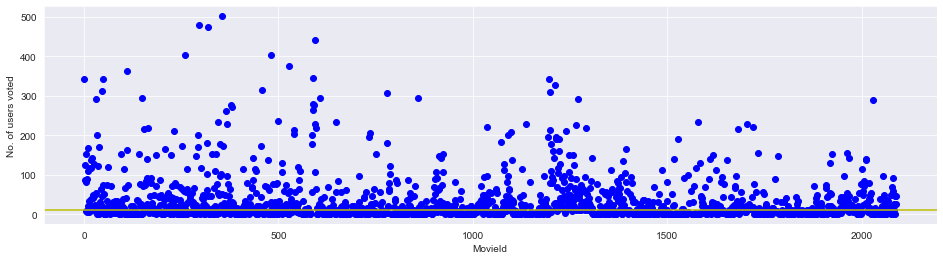

In [687]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='blue')
plt.axhline(y=10,color='y')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

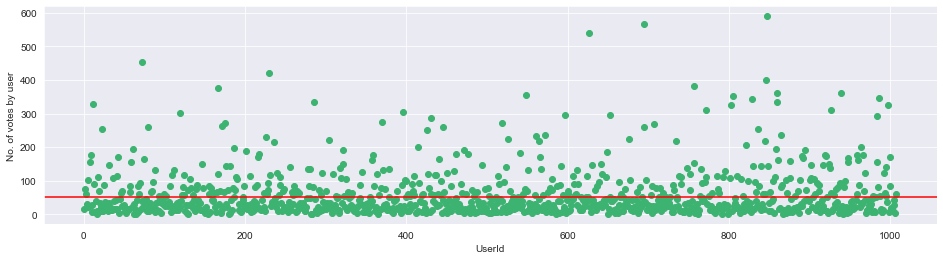

In [688]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [689]:
# grouping the movies based on average rating
average_rating_movies = df_movies_ratings.groupby('title')['rating'].mean().sort_values(ascending=False)

In [690]:
average_rating_movies.head(10)

title
Wings of Courage (1995)                                5.0
Across the Sea of Time (1995)                          5.0
What Happened Was... (1994)                            5.0
American Dream (1990)                                  5.0
Saint of Fort Washington, The (1993)                   5.0
Careful (1992)                                         5.0
Carmen Miranda: Bananas Is My Business (1994)          5.0
Strawberry and Chocolate (Fresa y chocolate) (1993)    5.0
Nobody Loves Me (Keiner liebt mich) (1994)             5.0
Princess Caraboo (1994)                                5.0
Name: rating, dtype: float64

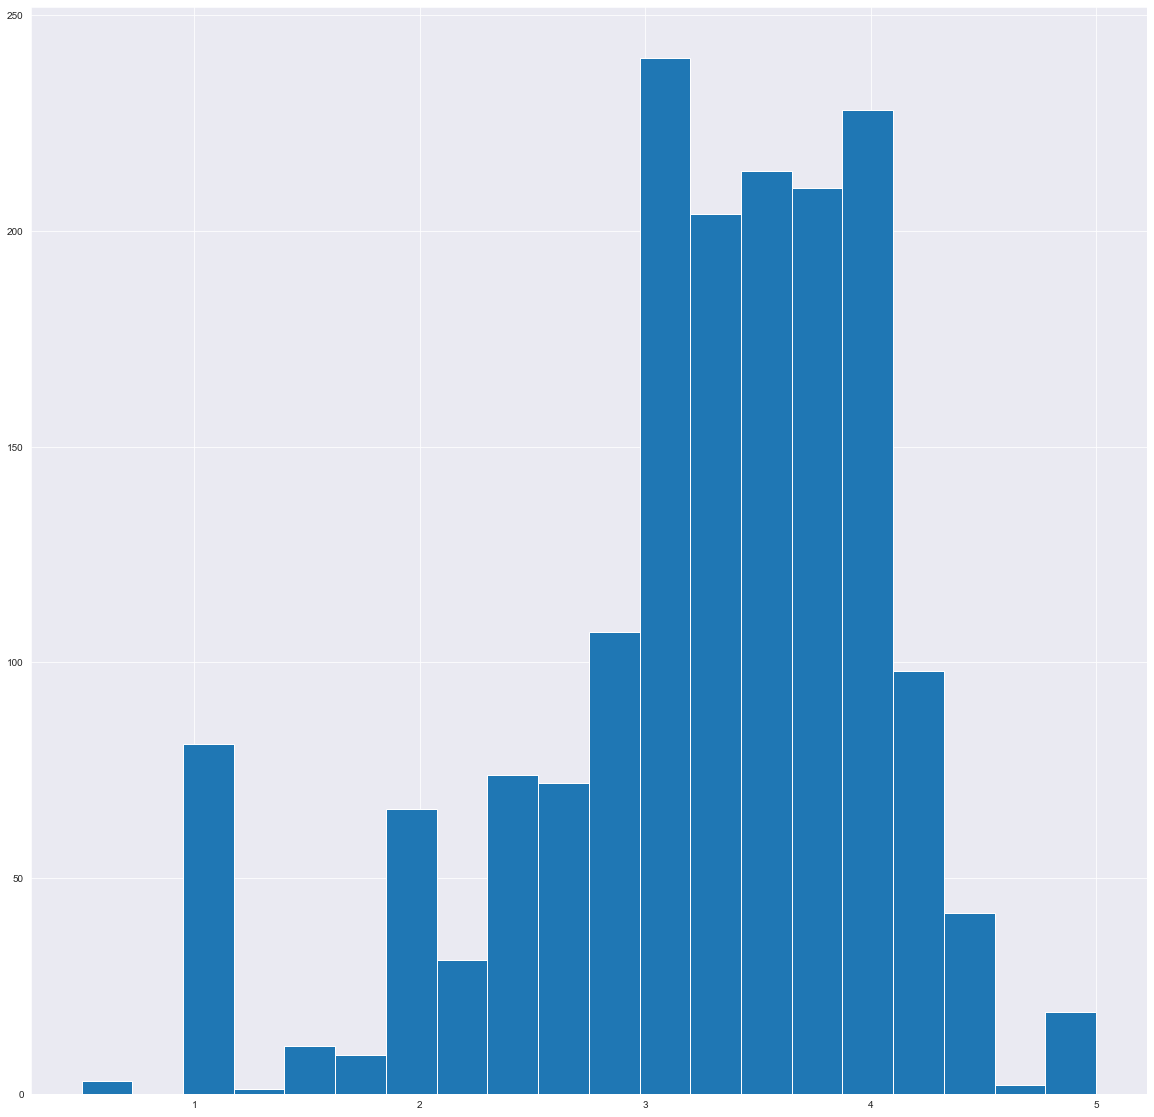

In [691]:
average_rating_movies.hist(bins=20)
plt.show()

Maximum movies have average rating in the range 3 to 4. The movies which have average = 5.0 may be the ones which may have been watched once or twice.

rating    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

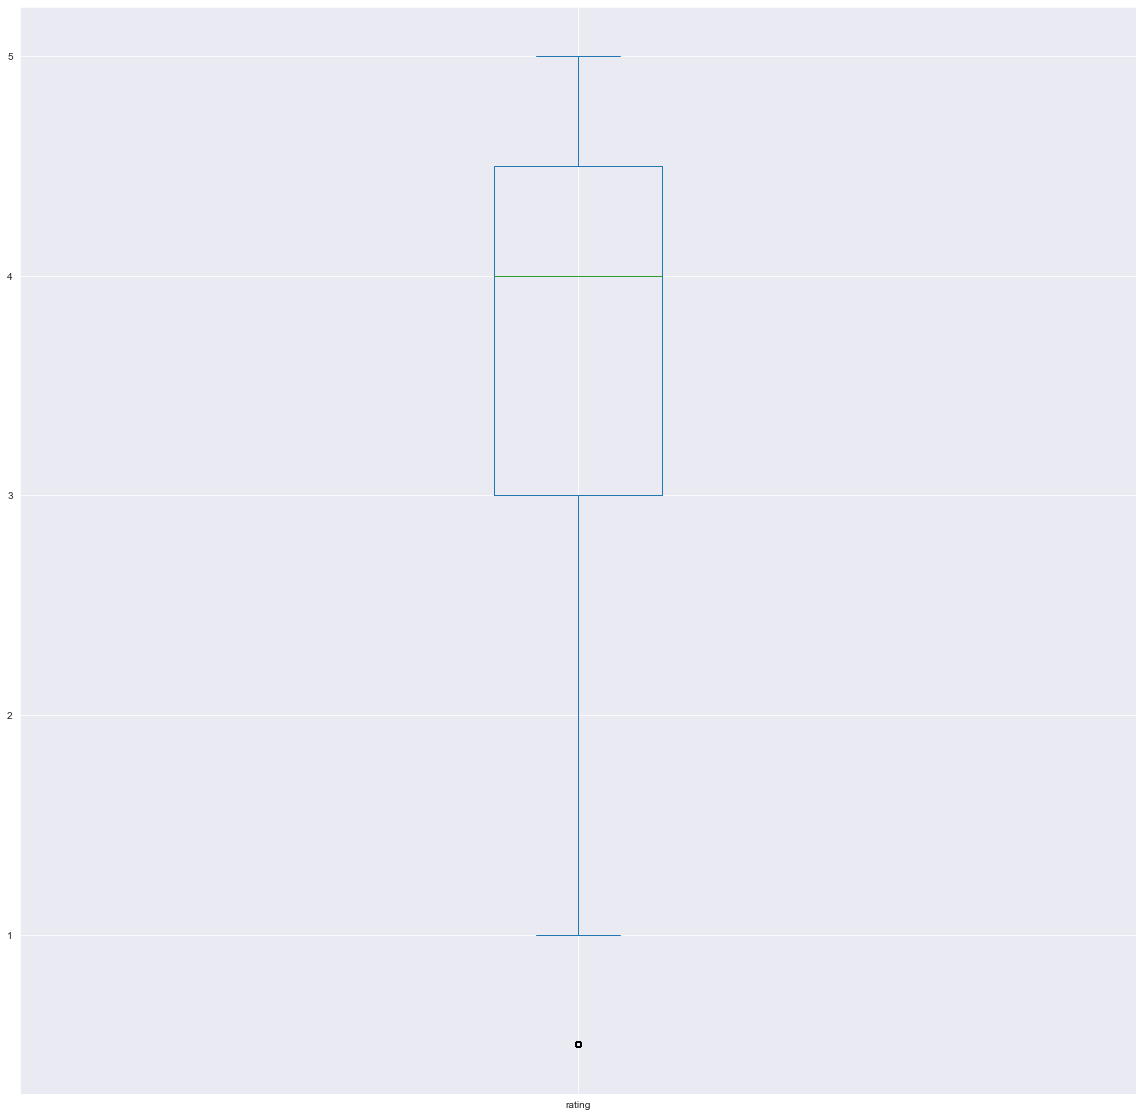

In [692]:
df_ratings['rating'].plot(kind='box', subplots=True)

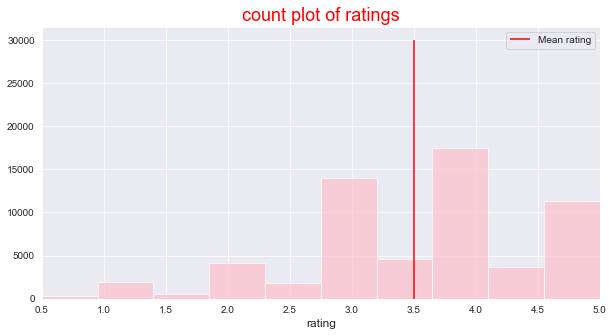

In [693]:
plt.figure(figsize=(10,5))
plt.hist(df_movies_ratings['rating'],bins=10, color='pink', alpha=0.7)
plt.xlabel('rating',size=12)
plt.xlim(0.5,5)
# plt.ylim(0,30000)
plt.vlines(x=3.5, ymin=0, ymax=30000, color='red', label='Mean rating')
plt.ylabel('')
plt.title('count plot of ratings',size=18, color='red')
plt.legend()
plt.show()

In [694]:
df_movies_ratings.shape

(59956, 25)

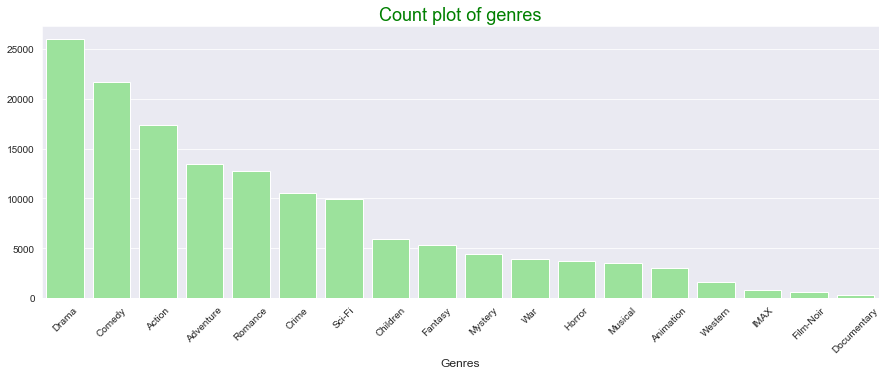

In [695]:
genres_count = df_movies_ratings.iloc[:,7:].sum(axis=0).reset_index().rename(columns={'index':'genre',0:'count'})
genres_count.sort_values('count',ascending=False, inplace=True)

plt.figure(figsize=(15,5))
sns.barplot(x = genres_count['genre'], y=genres_count['count'], color='lightgreen')
plt.xticks(rotation=45)
plt.xlabel('Genres', size=12)
plt.ylabel('')
plt.title('Count plot of genres', size=18, color='green')
plt.show()

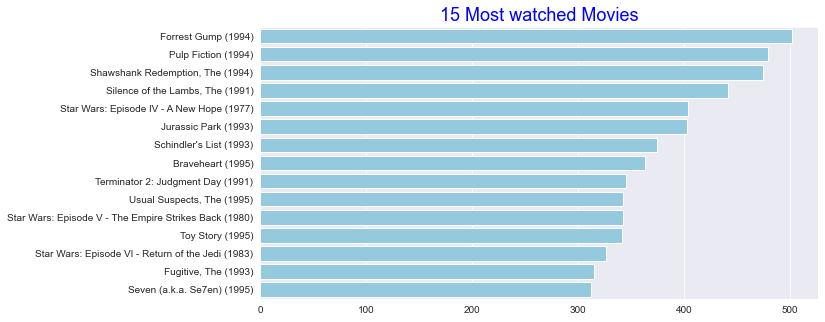

In [696]:
mr = df_movies_ratings.groupby('title')['title'].count().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
sns.barplot(y = mr.index, x=mr.values, color='skyblue')
plt.ylabel('')
plt.title('15 Most watched Movies', size=18, color='blue')
plt.show()

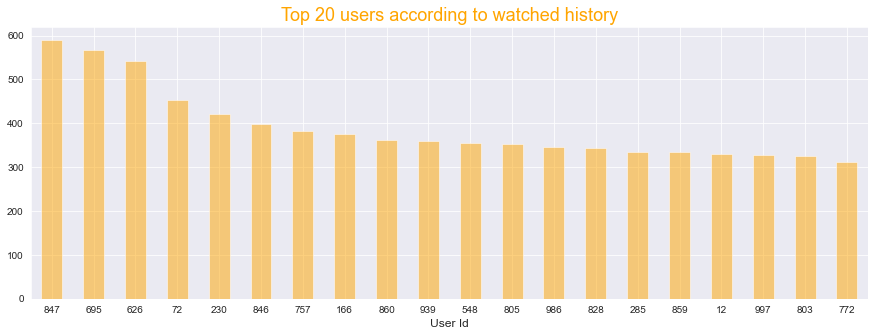

In [697]:
user = df_movies_ratings.groupby('userId')['title'].count().sort_values(ascending=False).head(20)

plt.figure(figsize=(15,5))
user.plot(kind="bar", color="orange", alpha=0.5)
plt.title("Top 20 users according to watched history", size=18, color='orange')
plt.xlabel('User Id', size=12)
plt.xticks(rotation=0)
plt.show()

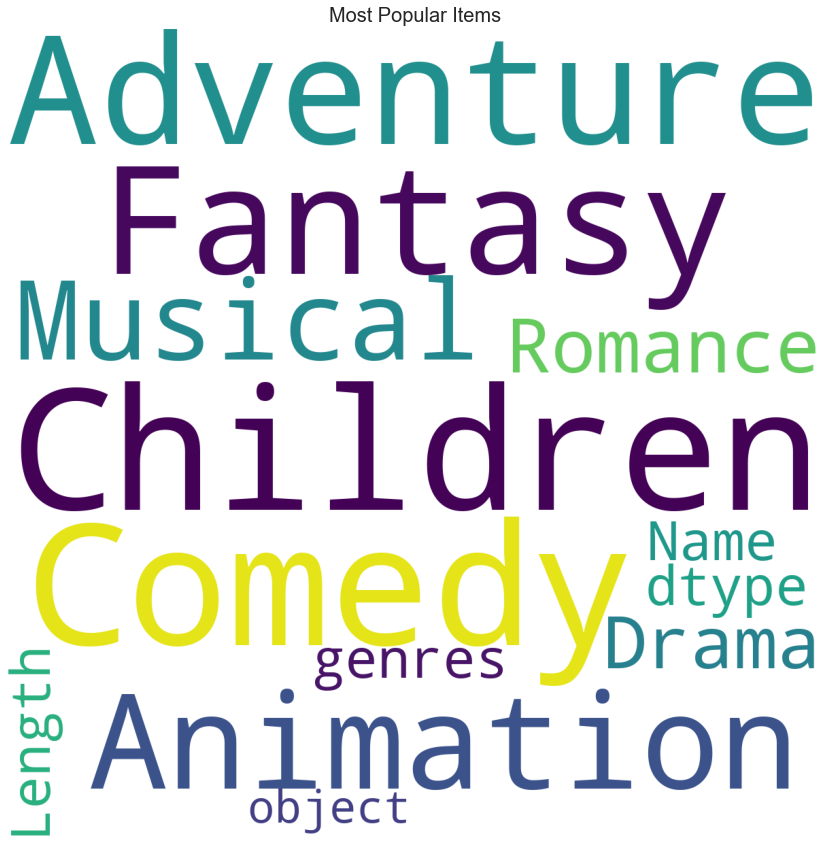

In [698]:
### Word cloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df_movies['genres']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

In [699]:
y = df_movies['genres'].value_counts().head(50).to_frame()
y.index

Index(['Drama', 'Comedy', 'Drama|Romance', 'Comedy|Drama', 'Comedy|Romance',
       'Documentary', 'Horror', 'Comedy|Drama|Romance', 'Crime|Drama',
       'Drama|Thriller', 'Children|Comedy', 'Drama|War', 'Horror|Thriller',
       'Thriller', 'Adventure|Children', 'Crime|Drama|Thriller',
       'Action|Thriller', 'Romance', 'Action|Adventure|Thriller',
       'Action|Drama', 'Action', 'Action|Crime|Thriller', 'Comedy|Crime',
       'Children|Drama', 'Drama|Mystery', 'Action|Sci-Fi|Thriller',
       'Action|Drama|Thriller', 'Crime', 'Drama|Musical', 'Crime|Thriller',
       'Action|Adventure|Sci-Fi|Thriller', 'Action|Adventure|Sci-Fi',
       'Action|Adventure', 'Comedy|Musical|Romance', 'Horror|Sci-Fi',
       'Adventure|Drama', 'Drama|Fantasy|Romance', 'Children|Comedy|Fantasy',
       'Drama|Romance|War', 'Adventure|Children|Drama', 'Comedy|Thriller',
       'Action|Crime|Drama|Thriller', 'Crime|Drama|Mystery|Thriller',
       'Comedy|War', 'Drama|Mystery|Thriller', 'Action|Drama|War

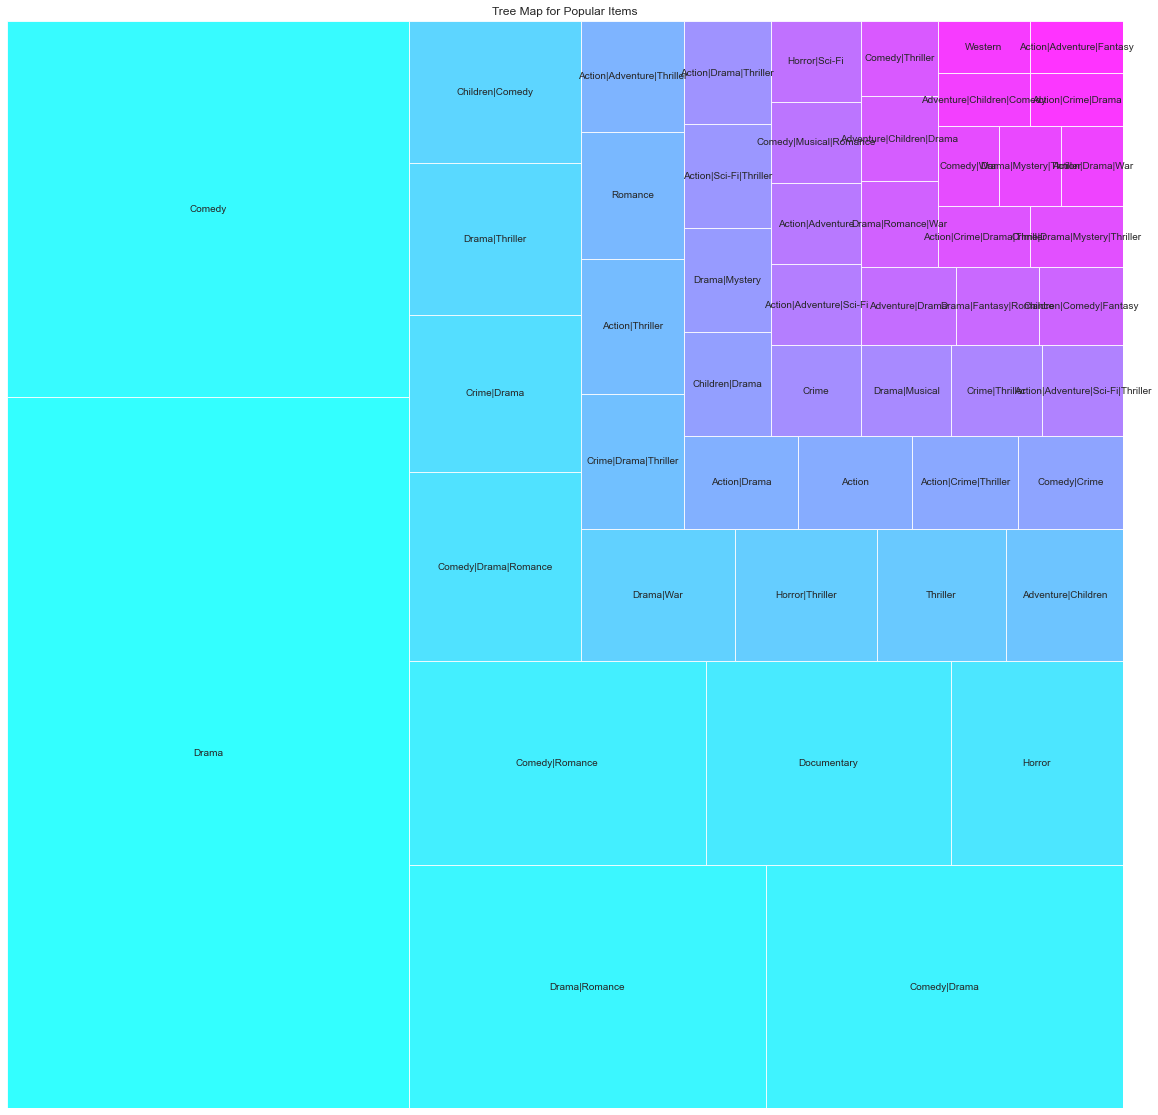

In [700]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [701]:
# This function will return a dataframe in which there are 3 columns. The first column is year.
# The second column is number of movies released in that year. (according to data we have)
# Third column is the most watched movie of that year. (in the given data)
# It only takes one argument which is data.

def best_movie(dataframe):
    df = dataframe.copy()
    movieid = df.year.unique()
    year = list()
    nMovies= list()
    mostWatched = list()
    for i in movieid:
        year.append(i)
        nMovies.append(df[df['year']==i]['title'].nunique())
        mostWatched.append(df[df['year']==i]['title'].value_counts().index[0])

    df1 = pd.DataFrame({'year':year,'nMoviesReleased':nMovies, 'mostWatchedMovie':mostWatched})
    df1.sort_values('year', inplace=True)
    return(df1)

In [702]:
# calling the function and reading its top 10 rows
yearWiseBestMovie = best_movie(df_movies_ratings)
yearWiseBestMovie.head(10)

,year,nMoviesReleased,mostWatchedMovie
64,1922,1,"Nosferatu (Nosferatu, eine Symphonie des Graue..."
59,1927,2,Metropolis (1927)
71,1929,1,"Broadway Melody, The (1929)"
65,1930,1,All Quiet on the Western Front (1930)
8,1931,2,M (1931)
69,1932,2,Grand Hotel (1932)
63,1933,2,Duck Soup (1933)
67,1934,4,It Happened One Night (1934)
61,1935,4,"Bride of Frankenstein, The (Bride of Frankenst..."
70,1936,3,My Man Godfrey (1936)


---
## Data Preparation for Training

### Dividing the dataset into train and test

In [703]:
train, test = train_test_split(df_ratings, test_size=0.30, random_state=31)
print(train.shape)
print(test.shape)

(41969, 4)
(17987, 4)


### Copy train and test dataset
These dataset will be used for prediction and evaluation. 
- Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction. 
- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [704]:
dummy_train = train.copy()
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)

dummy_test = test.copy()
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

In [705]:
# The movies not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(1)

# The movies not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)

In [706]:
### Limit users to 500
dummy_train = dummy_train.head(500)
dummy_test = dummy_test.head(500)

In [707]:
# 1 means not watched by user and 0 means watched by user
dummy_train.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,46,47,48,50,51,52,53,...,2035,2036,2038,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [708]:
dummy_train.shape

(500, 1638)

In [709]:
# 0 means not watched by user and 1 means watched by user
dummy_test.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,52,54,...,2022,2023,2025,2026,2028,2033,2034,2035,2037,2038,2040,2041,2042,2043,2045,2046,2047,2048,2050,2051,2052,2053,2054,2056,2057,2058,2059,2060,2064,2065,2066,2067,2069,2070,2071,2072,2073,2074,2076,2077,2078,2080,2081,2082,2083,2084,2085,2086,2087,2088
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [710]:
dummy_test.shape

(500, 1398)

---
## Model Implementation


## 1. User Based Recommendation

#### Model Development

**Using Cosine Similarity**

> Here, replacing the NaN values with 0

In [711]:
# pivot ratings into movie features
df_movie_features = train.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)

In [712]:
df_movie_features.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,46,47,48,50,51,52,53,...,2035,2036,2038,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [713]:
df_movie_features = df_movie_features.head(500)

In [714]:
df_movie_features.shape

(500, 1638)

In [715]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix using 'cosine' measure

user_correlation = 1 - pairwise_distances(df_movie_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.05175048 0.06180623 ... 0.         0.         0.        ]
 [0.05175048 1.         0.24374364 ... 0.09781895 0.10740979 0.01522515]
 [0.06180623 0.24374364 1.         ... 0.09346111 0.12897424 0.        ]
 ...
 [0.         0.09781895 0.09346111 ... 1.         0.         0.        ]
 [0.         0.10740979 0.12897424 ... 0.         1.         0.        ]
 [0.         0.01522515 0.         ... 0.         0.         1.        ]]


In [716]:
user_correlation.shape

(500, 500)

##### What we are doing here
what will happen in **pairwise_distances** is that it will do pairwise multiplication of elements between each user(or row of the *df_movie_features*) and divided by square root of summing of squaring of each value of both the rows. <br>
Here we see how much a user is similar or dissimilar to all the other users.<br>
ex - 

                    userId1 . userId2(this is the dot product)
                    -------------------------------------------
                        sqrt(userId1^2) x sqrt(userId2^2)

- The given output was 500x500 metrics (because there are 500 users) in which diagonal is 1 and the values above the diagonal and below the diagonal are same and represents the distance.
- The first row of the metrics is of **user 1** and show the pairwise distance with all the other users. Similarly second row is of **user 2** and show the pairwise distance with all the other users and so on.

Using Adjusted Cosine

> Here, not removing the NaN values and calculating the mean only for the movies rated by the user

In [717]:
movie_features = train.pivot(
    index='userId',
    columns='movieId',
    values='rating')

In [718]:
movie_features = movie_features.head(500)

In [719]:
movie_features.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,46,47,48,50,51,52,53,...,2035,2036,2038,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [720]:
movie_features.shape

(500, 1638)

In [721]:
movie_features.columns

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088],
           dtype='int64', name='movieId', length=1638)

In [722]:
# user-1 watched movies
mf_user1 = movie_features.iloc[0].value_counts()
print(mf_user1)
print("\nTotal listed movies: ", len(movie_features.columns))
print("Watched movies by user-1: ", sum(mf_user1.values))

3.5    4
4.0    3
5.0    2
2.5    2
Name: 1, dtype: int64

Total listed movies:  1638
Watched movies by user-1:  11


**Normalising the rating of the movie for each user aroung 0 mean**


We are calculating the mean rating by each user excluding the NaN value. So consider user 1 who has watched 11 movies out of 1638. So we are calculating sum of rating given by user to those 11 movies divided by count of movies i.e. 11. Similarly for all the user we calculate the mean rating.

In [723]:
mean = np.nanmean(movie_features, axis=1) # nanmean calculate the mean excluding NaN values
print(mean.shape)

(500,)


In [724]:
# finally subtracting each user mean rating from its own values

df_subtracted = (movie_features.T - mean).T
df_subtracted.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,46,47,48,50,51,52,53,...,2035,2036,2038,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.227273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.068627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.068627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.162162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.837838,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.722222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.276923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.276923,NaN,1.276923,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [725]:
df_subtracted.shape


(500, 1638)

#### Finding cosine similarity

In [726]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.          0.00941178  0.0224335  ...  0.          0.
   0.        ]
 [ 0.00941178  1.          0.07197929 ...  0.03641791  0.07073435
   0.02940487]
 [ 0.0224335   0.07197929  1.         ... -0.01680079 -0.03215976
   0.        ]
 ...
 [ 0.          0.03641791 -0.01680079 ...  1.          0.
   0.        ]
 [ 0.          0.07073435 -0.03215976 ...  0.          1.
   0.        ]
 [ 0.          0.02940487  0.         ...  0.          0.
   1.        ]]


In [727]:
user_correlation.shape

(500, 500)

### Prediction

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [728]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1.        , 0.00941178, 0.0224335 , ..., 0.        , 0.        ,
        0.        ],
       [0.00941178, 1.        , 0.07197929, ..., 0.03641791, 0.07073435,
        0.02940487],
       [0.0224335 , 0.07197929, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.03641791, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.07073435, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.02940487, 0.        , ..., 0.        , 0.        ,
        1.        ]])

Rating predicted by the user (for movies rated as well as not rated) is the weighted sum of correlation with the movie rating (as present in the rating dataset). 

In [729]:
# These are the scores of all the movies by all users 

user_predicted_ratings = np.dot(user_correlation, movie_features.fillna(0)) # 500x500 . 500x1999 = 500x1999
user_predicted_ratings

array([[ 3.89874095,  0.40558691,  0.40166352, ...,  0.18144141,
         0.92134161,  0.37189318],
       [19.17558106,  4.94062375,  2.91843446, ...,  0.21810144,
         1.07491456,  0.85903819],
       [18.81666236,  2.91685779,  2.42106987, ...,  0.03368261,
         1.09319848,  0.17817872],
       ...,
       [11.43251308,  3.73903498,  2.30257563, ...,  0.04696653,
         0.6192865 ,  0.48354384],
       [13.73064831,  2.82355856,  7.72029959, ...,  0.        ,
         0.72275814,  0.        ],
       [ 0.71065383,  0.48600955,  0.25221557, ...,  0.        ,
         0.11794541,  0.0411206 ]])

In [730]:
user_predicted_ratings.shape

(500, 1638)

Since we are interested only in the movies not rated by the user, we will ignore the movies rated by the user by making it zero. 

In [731]:
user_final_rating = np.multiply(user_predicted_ratings, dummy_train)   # 500x1999 x 500x1999 = 500x1999
user_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,46,47,48,50,51,52,53,...,2035,2036,2038,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.898741,0.405587,0.401664,0.000000,0.116776,0.501036,0.298492,0.000000,0.107878,0.621779,0.897777,0.007017,0.0,0.067783,0.022225,0.733441,0.764938,0.018807,0.551766,0.000000,0.999159,0.335595,0.013431,0.157685,0.580435,0.000000,0.059891,0.061874,0.953779,0.000000,0.146391,2.903471,0.000000,1.405455,0.000000,1.158503,2.145062,0.183576,0.000000,0.000000,0.012267,0.018355,0.215768,0.047539,2.161154,0.292322,2.529678,0.0,0.901393,0.0,...,0.0,0.000000,0.010101,0.006514,0.000000,0.005003,0.0,0.272162,0.021052,0.094008,0.0,0.181441,0.272162,0.0,0.0,0.014210,0.006886,0.776748,0.0,0.0,0.0,0.719333,0.401463,0.080096,0.0,0.0,1.448597,0.628531,0.0,0.036830,0.000000,0.0,0.000000,0.022515,0.006514,0.002496,0.000000,0.767566,0.017844,1.972155,0.0,0.529898,1.335337,0.124620,0.230806,0.000000,0.023483,0.181441,0.921342,0.371893
2,0.000000,4.940624,2.918434,0.000000,2.708874,5.577331,3.409221,0.232598,0.740461,5.918024,5.652948,0.000000,0.0,1.539620,0.320539,3.665849,3.867367,0.891631,3.492244,0.117935,4.687346,1.608246,0.657571,0.520649,5.216405,0.550279,0.413478,0.568365,1.331914,0.026965,1.115903,14.098823,0.279526,5.713115,0.343013,4.304211,7.650649,0.450324,0.602383,0.374351,0.173200,1.285200,0.570994,1.494573,15.232893,2.260792,13.950403,0.0,1.884807,0.0,...,0.0,0.000000,0.220613,0.115467,0.246261,0.298669,0.0,0.327152,0.176790,0.919734,0.0,0.795922,0.327152,0.0,0.0,0.064452,0.693791,3.653184,0.0,0.0,0.0,1.951349,1.357466,0.350993,0.0,0.0,1.618703,0.883528,0.0,0.722614,0.023529,0.0,0.000000,0.290034,0.291131,0.000000,0.000000,1.079894,0.349983,2.646037,0.0,2.482205,0.000000,0.469925,0.473572,0.036240,1.929197,0.218101,1.074915,0.859038
3,0.000000,2.916858,2.421070,0.000000,1.671076,8.323903,2.273735,0.418316,0.616661,4.986055,6.550701,0.043998,0.0,2.530117,0.650023,5.815410,4.297149,1.786610,4.101337,0.063600,8.427069,1.350921,0.471400,0.430811,8.614043,0.388100,1.111104,0.450264,0.000000,0.133084,1.042330,16.616111,0.000000,4.753059,0.218081,7.406549,8.743838,0.464106,1.021674,0.122418,0.162797,0.316424,2.017379,0.762802,20.566403,2.677296,0.000000,0.0,1.637505,0.0,...,0.0,0.075388,0.033277,0.037519,0.000000,0.145157,0.0,0.050524,0.141825,1.196120,0.0,0.085588,0.050524,0.0,0.0,0.044639,0.533433,0.900776,0.0,0.0,0.0,2.400499,1.246631,0.067069,0.0,0.0,1.739156,1.453145,0.0,0.656807,0.056084,0.0,0.140887,0.334024,0.245322,0.000000,0.304828,2.921081,0.229682,2.843861,0.0,2.149127,2.794351,0.273298,0.531799,0.241043,1.487893,0.033683,1.093198,0.178179
4,0.000000,3.525913,1.978666,0.000000,2.285806,7.709074,2.498776,0.079184,1.040323,4.826663,3.591170,0.000000,0.0,3.025987,0.655392,4.914849,4.797881,0.598258,2.402536,0.000000,3.710051,0.534867,0.544786,0.551565,7.762848,1.630391,0.710187,0.877325,2.318699,0.383523,0.730132,16.707925,0.011191,3.374413,0.884256,5.491896,5.434598,0.220755,0.613342,0.258039,0.255608,0.712644,1.015693,0.863292,13.422995,0.793674,18.106943,0.0,2.571328,0.0,...,0.0,0.000000,0.053786,0.078972,0.000000,0.009454,0.0,0.227483,0.264577,0.496618,0.0,0.481049,0.227483,0.0,0.0,0.009454,0.240630,1.422869,0.0,0.0,0.0,2.003815,0.832877,0.357647,0.0,0.0,1.304133,1.195273,0.0,0.575842,0.000000,0.0,0.023406,0.081882,0.416557,0.105681,0.064412,3.086254,0.006811,2.439549,0.0,1.034194,3.355687,0.310167,0.180569,0.000000,1.056905,0.151655,0.498172,0.664918
5,16.035652,5.146180,3.920066,0.186448,3.943594,8.644291,4.633737,0.173977,1.317144,8.655416,7.755268,0.139874,0.0,1.048693,0.676081,6.106950,6.113681,1.364193,0.000000,0.111389

#### What we have done So far ?
- In *dummy_train*, what we had done previously is that we make all those movie ratings to 0 which the user already watched (or for which user provide rating already).
- Now by multiplying *user_predicted_ratings* with *dummy_train*, what we do is we multiply each user ratings in user_predicted_ratings with that of its dummy_train ratings and hence those values becomes 0 which is already watched or rating is given by the user. 
- For which the rating is not given by user in dummy_train has set to 1 previously and hence when multiplied by user_predicted_ratings gives some value. 

---
#### Top 10 recommended movies to users</font>
Created a function in which you just need to give the user_id and it will return you the top 10 recommended movies for that user.

In [732]:
def top_10_movies_for_user(i):
    user_i = user_final_rating.loc[i].to_frame()
    user_i.reset_index(inplace=True)
    user_i.rename(columns= {'movieId':'movieId', i:'ratings'}, inplace=True)
    user_join_i = pd.merge(user_i, df_movies, on='movieId')
    return user_join_i.sort_values(by=["ratings"], ascending=False)[0:10]

In [733]:
top_10_movies_for_user(200)

,movieId,ratings,title,genres
131,150,13.008501,Apollo 13 (1995),Adventure|Drama|IMAX
524,593,12.214571,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
322,356,11.537263,Forrest Gump (1994),Comedy|Drama|Romance|War
409,457,11.270589,"Fugitive, The (1993)",Thriller
520,588,11.001720,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
266,296,10.945048,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
523,592,10.468134,Batman (1989),Action|Crime|Thriller
526,595,9.337619,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
100,110,8.830575,Braveheart (1995),Action|Drama|War
521,589,8.694843,Terminator 2: Judgment Day (1991),Action|Sci-Fi


### Evaluation

Evaluation will be same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the user instead of predicting it for the movie not rated by the user.

In [734]:
test_movie_features = test.pivot(
    index='userId',
    columns='movieId',
    values='rating')

test_movie_features = test_movie_features.iloc[:500]
test_movie_features.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,52,54,...,2022,2023,2025,2026,2028,2033,2034,2035,2037,2038,2040,2041,2042,2043,2045,2046,2047,2048,2050,2051,2052,2053,2054,2056,2057,2058,2059,2060,2064,2065,2066,2067,2069,2070,2071,2072,2073,2074,2076,2077,2078,2080,2081,2082,2083,2084,2085,2086,2087,2088
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [735]:
mean = np.nanmean(test_movie_features, axis=1)
test_df_subtracted = (test_movie_features.T-mean).T

In [736]:
# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[ 1.          0.          0.         ...  0.         -0.16151457
  -0.1294639 ]
 [ 0.          1.         -0.00738685 ...  0.          0.07982697
   0.03388107]
 [ 0.         -0.00738685  1.         ...  0.          0.
   0.03118835]
 ...
 [ 0.          0.          0.         ...  1.          0.
   0.02527061]
 [-0.16151457  0.07982697  0.         ...  0.          1.
   0.02800269]
 [-0.1294639   0.03388107  0.03118835 ...  0.02527061  0.02800269
   1.        ]]


In [737]:
test_user_correlation.shape

(500, 500)

In [738]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_movie_features.fillna(0))
test_user_predicted_ratings

array([[3.14512130e+00, 1.27047107e+00, 4.16069261e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.15911933e+00, 4.05804948e+00, 1.31764626e+00, ...,
        1.95914614e-01, 4.95718825e-01, 9.06457365e-02],
       [3.01562892e+00, 4.83342437e-01, 6.68093896e-01, ...,
        0.00000000e+00, 9.24307983e-03, 1.25040147e-01],
       ...,
       [1.80385944e+00, 3.67894590e+00, 7.94025243e-01, ...,
        0.00000000e+00, 3.51866638e-01, 0.00000000e+00],
       [3.78796765e+00, 2.53984556e+00, 9.62800073e-01, ...,
        0.00000000e+00, 6.30550870e-01, 3.02310079e-02],
       [1.07181958e+01, 1.98444662e+00, 3.73301835e+00, ...,
        0.00000000e+00, 6.52678144e-01, 3.39042598e-01]])

In [739]:
test_user_predicted_ratings.shape

(500, 1398)

Doing prediction for the movies rated by the user

In [740]:
test_user_final_rating = np.multiply(test_user_predicted_ratings, dummy_test)

In [741]:
test_user_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,52,54,...,2022,2023,2025,2026,2028,2033,2034,2035,2037,2038,2040,2041,2042,2043,2045,2046,2047,2048,2050,2051,2052,2053,2054,2056,2057,2058,2059,2060,2064,2065,2066,2067,2069,2070,2071,2072,2073,2074,2076,2077,2078,2080,2081,2082,2083,2084,2085,2086,2087,2088
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.851812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.148101,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.058345,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5,8.14236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,8.101156,0.0,0.0,5.107313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the movies rated by user. For RMSE, normalising the rating to (1,5) range

In [742]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [3.17002782        nan 2.11986582 ...        nan        nan        nan]]


In [743]:
test_ = test.pivot(
    index='userId',
    columns='movieId',
    values='rating')

test_ = test_.iloc[:500]

In [744]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [745]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

1.4117828777483052


## 2. Item Based Recommendation

### Model Development

Using Correlation

Taking the transpose of the rating matrix to normalize the rating around the mean for different movie ID. In the user based similarity, we had taken mean for each user intead of each movie.

In [746]:
movie_features = train.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).T
movie_features = movie_features.iloc[:,:500]
movie_features.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,...,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.5,4.0,3.0,NaN,NaN,NaN,4.0,NaN,3.5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,...,NaN,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,2.5,4.0,NaN,NaN,NaN,3.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN


Normalising the movie rating for each movie
We are calculating the mean rating of each movie excluding the NaN value. So consider movie 1 who has beem watched by 13 users out of 500 users. So we are calculating sum of rating given by each user to this movie-1 divided by count of users i.e. 500. Similarly for all the movies we calculate the mean rating.

In [747]:
mean = np.nanmean(movie_features, axis=1) # nanmean calculate the mean excluding NaN values
print(mean.shape)

(1638,)


In [748]:
# finally subtracting each user mean rating from its own values

df_subtracted = (movie_features.T-mean).T
df_subtracted.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,...,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,-0.415179,0.084821,-0.915179,NaN,NaN,NaN,0.084821,NaN,-0.415179,NaN,NaN,0.084821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.915179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084821,NaN,NaN,NaN,-1.915179,NaN,NaN,NaN,0.084821,...,NaN,0.084821,NaN,-1.915179,NaN,NaN,NaN,NaN,NaN,NaN,1.084821,0.584821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.084821,NaN,NaN,NaN,NaN,NaN,NaN,1.084821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084821,NaN,0.084821,NaN,NaN,NaN,-1.415179,0.084821,NaN,NaN,NaN,-0.915179,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.527778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027778,-0.972222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.472222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.527778,NaN,NaN,NaN,NaN,NaN,NaN,0.027778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.632353,NaN,NaN,NaN,-1.367647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.632353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.367647,NaN,NaN,NaN,...,NaN,0.632353,NaN,NaN,NaN,-0.367647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.132353,NaN,NaN,NaN,NaN,NaN,NaN,1.632353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.367647,NaN,NaN,NaN,NaN,0.632353,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.333333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,NaN


In [749]:
df_subtracted.shape

(1638, 500)

Finding the cosine similarity
Note that since the data is normalised, both the cosine metric and correlation metric will give the same value.

In [750]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.         -0.00304316  0.01884063 ...  0.          0.05045742
   0.05948659]
 [-0.00304316  1.          0.09934336 ...  0.         -0.08157401
  -0.0272552 ]
 [ 0.01884063  0.09934336  1.         ...  0.          0.04129193
   0.06608312]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.05045742 -0.08157401  0.04129193 ...  0.          1.
   0.        ]
 [ 0.05948659 -0.0272552   0.06608312 ...  0.          0.
   1.        ]]


In [751]:
item_correlation.shape

(1638, 1638)

#### Pairwise distance calculation
what will happen in **pairwise_distances** is that it will do pairwise multiplication of elements between each movie(or row of the *movie_features*) and divided by square root of summing of squaring of each value of both the rows. <br>
Here we see how much a movie is similar or dissimilar to all the other movies.<br>
ex - 

                    movieId1 . movieId2(this is the dot product)
                    -------------------------------------------
                        sqrt(movieId1^2) x sqrt(movieId2^2)

- The given output was 1638x1638 metrics (because there are 1638 movies) in which diagonal is 1 and the values above the diagonal and below the diagonal are same and represents the distance.
- The first row of the metrics is of **movie 1** and show the pairwise distance with all the other movies. Similarly second row is of **movie 2** and show the pairwise distance with all the other movies and so on.

Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [752]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.        , 0.01884063, ..., 0.        , 0.05045742,
        0.05948659],
       [0.        , 1.        , 0.09934336, ..., 0.        , 0.        ,
        0.        ],
       [0.01884063, 0.09934336, 1.        , ..., 0.        , 0.04129193,
        0.06608312],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05045742, 0.        , 0.04129193, ..., 0.        , 1.        ,
        0.        ],
       [0.05948659, 0.        , 0.06608312, ..., 0.        , 0.        ,
        1.        ]])

### Prediction

In [753]:
item_predicted_ratings = np.dot((movie_features.fillna(0).T), item_correlation)
item_predicted_ratings

array([[ 1.31364916,  0.6502873 ,  1.5823045 , ...,  0.        ,
         0.13720451,  0.80659664],
       [14.79318146,  6.43583359,  6.09417819, ...,  0.        ,
         3.56964204, 12.37446619],
       [11.24715123,  6.10098653,  5.01285798, ...,  0.        ,
         1.84312271,  6.8160356 ],
       ...,
       [ 0.83291917,  0.48088867,  0.55388133, ...,  0.        ,
         0.16265732,  0.41582575],
       [ 7.70422511,  6.09982169,  9.09375293, ...,  0.        ,
         0.82741302,  3.467548  ],
       [ 0.58402107,  0.3912767 ,  0.06000778, ...,  0.        ,
         0.29042238,  2.0104729 ]])

In [754]:
item_predicted_ratings.shape

(500, 1638)

In [755]:
dummy_train.shape

(500, 1638)

#### Filtering the rating only for the movies not rated by the user for recommendation

In [756]:
item_final_rating = np.multiply(item_predicted_ratings, dummy_train)
item_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,46,47,48,50,51,52,53,...,2035,2036,2038,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.313649,0.650287,1.582305,0.000000,0.372809,0.933750,0.858969,0.0,0.108956,1.686149,2.077241,2.415613,0.0,2.716115,1.708096,1.902977,0.586383,0.290665,0.317624,0.000000,0.524554,0.335129,0.071323,0.096530,0.215677,0.000000,0.248222,0.225621,3.063924,0.762695,0.534090,1.412605,0.0,0.853169,0.224322,1.602234,1.238848,0.473044,0.656689,0.000000,0.000000,0.497935,0.185233,0.165711,0.688543,0.381395,1.409949,0.0,0.434249,0.0,...,0.0,0.0,0.240273,0.0,0.0,0.000000,0.0,0.0,2.415613,0.511259,0.0,0.376228,0.0,0.0,0.0,0.000000,0.322195,0.143656,0.0,0.0,0.0,0.988593,0.639183,0.052875,0.0,0.0,0.462662,0.823464,0.0,0.000000,0.0,0.0,0.0,0.000000,0.042126,0.0,0.560449,3.062274,0.0,1.067006,0.0,0.493747,2.069564,0.152586,0.000000,0.367212,0.203508,0.0,0.137205,0.806597
2,0.000000,6.435834,6.094178,0.279236,4.446636,7.873131,7.441223,0.0,6.325066,10.522975,13.583301,4.024927,0.0,10.676879,3.736347,6.399715,6.698199,6.321545,6.316661,0.732918,7.827536,5.530367,4.977229,2.652817,4.498359,1.750235,4.475163,1.556488,4.679514,2.292039,8.850257,10.673171,0.0,6.333653,2.889146,10.470468,10.249222,2.087605,3.328196,0.764718,2.302863,7.117202,3.451880,1.450517,9.770003,4.137377,12.244150,0.0,8.888540,0.0,...,0.0,0.0,4.806882,0.0,0.0,4.745259,0.0,0.0,4.241181,1.953797,0.0,0.513497,0.0,0.0,0.0,7.947593,2.574957,5.610344,0.0,0.0,0.0,9.909477,7.982002,3.567730,0.0,0.0,6.375162,6.697296,0.0,1.135601,0.0,0.0,0.0,4.496994,1.871239,0.0,0.304705,2.850619,0.0,4.965181,0.0,4.388708,0.000000,4.631587,8.040167,2.196594,4.891849,0.0,3.569642,12.374466
3,0.000000,6.100987,5.012858,0.647388,5.025740,6.781489,5.195083,0.0,2.408980,7.508928,8.413596,3.697719,0.0,4.978901,4.261447,8.534688,6.939954,3.819192,5.930197,0.733133,7.085690,4.422986,4.593454,1.674448,4.878882,0.572113,4.408735,0.533346,0.000000,2.435714,4.563960,11.342991,0.0,6.283587,1.095966,9.984480,8.739904,1.984375,3.586164,1.386506,3.006754,7.002215,2.666492,0.724841,8.979895,2.118679,0.000000,0.0,6.337237,0.0,...,0.0,0.0,2.219788,0.0,0.0,1.557216,0.0,0.0,3.174201,2.315222,0.0,0.493725,0.0,0.0,0.0,2.099467,1.602883,6.242604,0.0,0.0,0.0,3.532681,4.830991,3.702437,0.0,0.0,7.892398,4.520167,0.0,2.342266,0.0,0.0,0.0,1.663312,1.731628,0.0,0.322425,2.487623,0.0,4.608168,0.0,2.824446,5.673013,1.937691,3.291253,2.299403,3.881134,0.0,1.843123,6.816036
4,0.000000,2.058303,1.867177,0.426923,2.267916,3.087801,2.787787,0.0,2.133415,3.952355,3.991505,0.524775,0.0,1.945806,0.206042,3.955882,3.093340,0.476121,2.018907,0.494015,4.458718,1.541450,3.582015,0.203868,2.050919,0.213427,3.248124,0.456108,2.594806,0.695896,1.122766,5.537750,0.0,2.443916,0.456551,5.315819,4.120984,0.526086,0.854290,0.239345,2.836843,2.766046,1.896718,0.140868,4.663973,1.331305,5.009481,0.0,3.161268,0.0,...,0.0,0.0,0.778864,0.0,0.0,0.648376,0.0,0.0,0.698079,1.193338,0.0,0.126004,0.0,0.0,0.0,0.665507,1.125619,2.553674,0.0,0.0,0.0,2.918680,2.996006,3.511442,0.0,0.0,4.534108,1.946949,0.0,0.556910,0.0,0.0,0.0,0.882541,0.823153,0.0,0.652200,3.060302,0.0,1.940284,0.0,2.301401,4.580043,0.628376,1.460546,1.800321,1.650056,0.0,0.631869,4.788237
5,13.371655,16.384849,11.750035,3.075008,14.393099,11.644358,11.960895,0.0,8.522355,16.565858,16.494562,9.475786,0.0,8.215457,8.079865,11.516161,13.962760,11.772180,0.000000,4.191695,17.685436,11.771689,10.740002,3.356628,8.637709,2.797372,8.931640,2.876480,7.311268,2.209011,16.925348,0.000000,0.0,11.609860,1.101374,20.015243,17.665881,1.770699,2.742427,3.345249,6.246722,16.668737,3.415862,4.129287,0.000000,5.188

---
### Top 10 recommended movies to users</font>
Created a function in which you just need to give the user_id and it will return you the top 10 recommended movies for that user.

In [757]:
def top_10_movies_for_user(i):
    user_i = item_final_rating.loc[i].to_frame()
    user_i.reset_index(inplace=True)
    user_i.rename(columns= {'movieId':'movieId', i:'ratings'},inplace=True)
    user_join_i = pd.merge(user_i,df_movies,on='movieId')
    return user_join_i.sort_values(by=["ratings"],ascending=False)[0:10]

In [758]:
top_10_movies_for_user(200)

,movieId,ratings,title,genres
202,227,5.419911,Drop Zone (1994),Action|Thriller
519,587,5.392781,Ghost (1990),Comedy|Drama|Fantasy|Romance|Thriller
142,161,5.158610,Crimson Tide (1995),Drama|Thriller|War
1103,1356,5.144748,Star Trek: First Contact (1996),Action|Adventure|Sci-Fi|Thriller
316,350,5.110768,"Client, The (1994)",Drama|Mystery|Thriller
146,165,5.050744,Die Hard: With a Vengeance (1995),Action|Crime|Thriller
484,539,4.949492,Sleepless in Seattle (1993),Comedy|Drama|Romance
1027,1270,4.935952,Back to the Future (1985),Adventure|Comedy|Sci-Fi
152,173,4.921566,Judge Dredd (1995),Action|Crime|Sci-Fi
617,733,4.906311,"Rock, The (1996)",Action|Adventure|Thriller


### Evaluation

Evaluation will be same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the user instead of predicting it for the movie not rated by the user.

In [759]:
test_movie_features = test.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).T

In [760]:
test_movie_features = test_movie_features.iloc[:, :500]

In [761]:
mean = np.nanmean(test_movie_features, axis=1)
test_df_subtracted = (test_movie_features.T-mean).T

In [762]:
test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [763]:
test_item_correlation.shape

(1398, 1398)

In [764]:
test_movie_features.shape

(1398, 500)

In [765]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_movie_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,52,54,...,2022,2023,2025,2026,2028,2033,2034,2035,2037,2038,2040,2041,2042,2043,2045,2046,2047,2048,2050,2051,2052,2053,2054,2056,2057,2058,2059,2060,2064,2065,2066,2067,2069,2070,2071,2072,2073,2074,2076,2077,2078,2080,2081,2082,2083,2084,2085,2086,2087,2088
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.046926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.690168,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,8.060374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,16.149975,0.0,0.0,4.279924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [766]:
test_ = test.pivot(
    index='userId',
    columns='movieId',
    values='rating')

In [767]:
test_ = test_.iloc[:500]

In [768]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

test_ = test.pivot(
    index='userId',
    columns='movieId',
    values='rating')
test_ = test_.iloc[:500]



# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(feature_range=(1, 5))


#### Finding RMSE

In [769]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.0105018844034097


## 3. KNN Based model

In [770]:
# pivot ratings into movie features
df_movie_features = train.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)

In [771]:
df_movie_features.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,46,47,48,50,51,52,53,...,2035,2036,2038,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [772]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

csr_data = csr_matrix(df_movie_features.values)
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=15, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=15)

In [773]:
result = knn.kneighbors(csr_data, return_distance=True)

In [774]:
result

(array([[0.00000000e+00, 7.56074475e-01, 7.58724126e-01, ...,
         8.57463499e-01, 8.58207998e-01, 8.60663911e-01],
        [0.00000000e+00, 6.31447323e-01, 6.49568214e-01, ...,
         6.88342067e-01, 6.89449157e-01, 6.89921448e-01],
        [0.00000000e+00, 5.24416460e-01, 5.41332280e-01, ...,
         5.99198972e-01, 6.04102663e-01, 6.09253989e-01],
        ...,
        [1.11022302e-16, 4.51148943e-01, 4.83041415e-01, ...,
         5.62116684e-01, 5.65336590e-01, 5.74985242e-01],
        [0.00000000e+00, 5.24348506e-01, 5.31707094e-01, ...,
         6.60606043e-01, 6.61260140e-01, 6.70507984e-01],
        [0.00000000e+00, 6.66672823e-01, 6.73717486e-01, ...,
         7.23183096e-01, 7.25185997e-01, 7.25841719e-01]]),
 array([[  0,  53, 885, ..., 260, 963,  74],
        [  1, 248, 765, ..., 519, 667,  68],
        [  2, 729, 481, ..., 263, 806, 402],
        ...,
        [992, 685, 210, ..., 969, 902, 665],
        [993, 957, 654, ..., 204, 102, 692],
        [994, 125, 253, ...

In [775]:
# pivot ratings into movie features
df_movie_features_test = test.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)

In [776]:
df_movie_features_test

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,52,54,...,2022,2023,2025,2026,2028,2033,2034,2035,2037,2038,2040,2041,2042,2043,2045,2046,2047,2048,2050,2051,2052,2053,2054,2056,2057,2058,2059,2060,2064,2065,2066,2067,2069,2070,2071,2072,2073,2074,2076,2077,2078,2080,2081,2082,2083,2084,2085,2086,2087,2088
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,

In [777]:
df_movie_features_test

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,52,54,...,2022,2023,2025,2026,2028,2033,2034,2035,2037,2038,2040,2041,2042,2043,2045,2046,2047,2048,2050,2051,2052,2053,2054,2056,2057,2058,2059,2060,2064,2065,2066,2067,2069,2070,2071,2072,2073,2074,2076,2077,2078,2080,2081,2082,2083,2084,2085,2086,2087,2088
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,

In [778]:
mf_df = df_movie_features.T.reset_index()
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = df_movies[df_movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = mf_df[mf_df['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = mf_df.iloc[val[0]]['movieId']
            idx = df_movies[df_movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':df_movies.iloc[idx]['title'].values[0],'Genre':df_movies.iloc[idx]['genres'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [779]:
movie_name = "Jumanji"
print(df_movies[df_movies['title'].str.contains(movie_name)])
get_movie_recommendation(movie_name)

   movieId           title                      genres
1        2  Jumanji (1995)  Adventure|Children|Fantasy


,Title,Genre,Distance
1,Mortal Kombat (1995),Action|Adventure|Fantasy,0.684827
2,GoldenEye (1995),Action|Adventure|Thriller,0.683145
3,"Shadow, The (1994)",Action|Adventure|Fantasy|Mystery,0.682970
4,Hear My Song (1991),Comedy,0.682746
5,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance,0.678119
6,Once Were Warriors (1994),Crime|Drama,0.677254
7,Dirty Dancing (1987),Drama|Musical|Romance,0.669243
8,Shall We Dance (1937),Comedy|Musical|Romance,0.651747
9,Love in the Afternoon (1957),Comedy|Romance,0.649568
10,Mixed Nuts (1994),Comedy,0.631447
